In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [37]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
stock_data_scaled = pd.DataFrame(market_data_df, columns=["price_change_percentage_24h", "price_change_percentage_7h", "price_change_percentage_14d",
                                                                  "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"])


stock_data_scaled

market_data_dfd = StandardScaler().fit_transform(market_data_df["price_change_percentage_24h", "price_change_percentage_7h", "price_change_percentage_14d",
                                                                  "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"])


KeyError: ('price_change_percentage_24h', 'price_change_percentage_7h', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y')

In [40]:
# Create a DataFrame with the scaled data
df_stock_data_scaled = pd.DataFrame(
    stock_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7h", "price_change_percentage_14d",
            "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
            "price_change_percentage_1y"])

# Copy the crypto names from the original data
df_stock_data_scaled["price_change_percentage_24h"] = stock_data_scaled["price_change_percentage_24h"]
df_stock_data_scaled["price_change_percentage_7h"] = stock_data_scaled["price_change_percentage_7h"]
df_stock_data_scaled["price_change_percentage_14d"] = stock_data_scaled["price_change_percentage_14d"]
df_stock_data_scaled["price_change_percentage_30d"] = stock_data_scaled["price_change_percentage_30d"]
df_stock_data_scaled["price_change_percentage_60d"] = stock_data_scaled["price_change_percentage_60d"]
df_stock_data_scaled["price_change_percentage_200d"] = stock_data_scaled["price_change_percentage_200d"]
df_stock_data_scaled["price_change_percentage_1y"] = stock_data_scaled["price_change_percentage_1y"]

# Set the coinid column as index
df_stock_data_scaled('coinid', inplace=True)

# Display sample data
df_stock_data_scaled.head()

TypeError: 'DataFrame' object is not callable

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(market_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

c:\Users\natas\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\natas\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\natas\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\natas\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.792811e+06
3,4,8.352274e+05
4,5,4.373295e+05
5,6,2.721565e+05
6,7,2.132252e+05
7,8,1.742797e+05
8,9,1.360407e+05
9,10,9.936461e+04


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

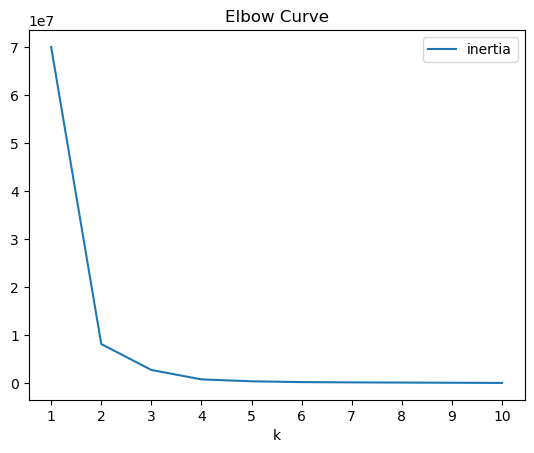

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 2

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df)

c:\Users\natas\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [45]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_3 = model.predict(market_data_df)
market_data_df['clusters_low'] = k_3

# View the resulting array of cluster values.
market_data_df.plot.scatter(
    x="hi_low_spread",
    y="close",
    c="clusters_lower",
    colormap="coolwarm")

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [14]:
# Create a copy of the DataFrame
market_data_df_predictions = market_data_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_predictions['crypto_market_data_3'] = crypto_market_data_3

# Display sample data
market_data_df_predictions.head(5)

NameError: name 'crypto_market_data_3' is not defined

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'crypto_market_data_3'

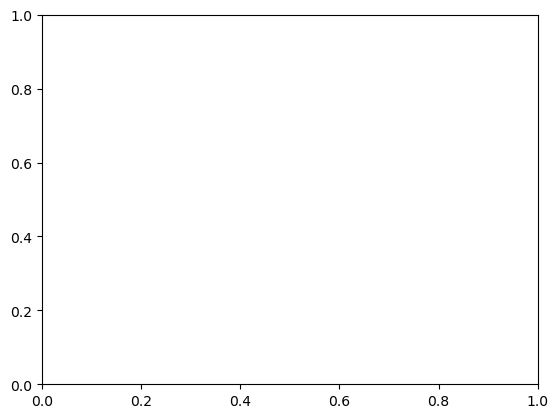

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_market_data_3",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [47]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
df_stock_data_scaled_pca = pca.fit_transform(stock_data_scaled)

# View the first five rows of the DataFrame. 
df_stock_data_scaled_pca[:5]

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [48]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [23]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
df_stock_data_scaled_pca = pd.DataFrame(df_stock_data_scaled
    ,
    columns=["PCA1", "PCA2"]
)

# Copy the crypto names from the original data
df_stock_data_scaled_pca["price_change_percentage_24h"] = stock_data_scaled["price_change_percentage_24h"]
df_stock_data_scaled_pca["price_change_percentage_7h"] = stock_data_scaled["price_change_percentage_7h"]
df_stock_data_scaled_pca["price_change_percentage_14d"] = stock_data_scaled["price_change_percentage_14d"]
df_stock_data_scaled_pca["price_change_percentage_30d"] = stock_data_scaled["price_change_percentage_30d"]
df_stock_data_scaled_pca["price_change_percentage_60d"] = stock_data_scaled["price_change_percentage_60d"]
df_stock_data_scaled_pca["price_change_percentage_200d"] = stock_data_scaled["price_change_percentage_200d"]
df_stock_data_scaled_pca["price_change_percentage_1y"] = stock_data_scaled["price_change_percentage_1y"]

# Set the coinid column as index
df_stock_data_scaled_pca.index('coinid', inplace=True)

# Display sample data
df_stock_data_scaled_pca.head()

NameError: name 'df_stock_data_scaled' is not defined

### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(df_stock_data_scaled_pca)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

NameError: name 'df_stock_data_scaled_pca' is not defined

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

NameError: name 'df_elbow_pca' is not defined

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

In [27]:
# Fit the K-Means model using the PCA data
model.fit(df_stock_data_scaled_pca)

NameError: name 'df_stock_data_scaled_pca' is not defined

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_lower = model.predict(df_stock_data_scaled_pca)

# Print the resulting array of cluster values.
df_stock_data_scaled_pca.plot.scatter(
    x="hi_low_spread",
    y="close",
    c="clusters_lower",
    colormap="coolwarm")

NameError: name 'df_stock_data_scaled_pca' is not defined

In [23]:
# Create a copy of the DataFrame with the PCA data
df_stock_data_scaled_pca_predictions = df_stock_data_scaled_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_stock_data_scaled_pca_predictions['crypto_market_data_3'] = crypto_market_data_3

# Display sample data
df_stock_data_scaled_pca_predictions.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

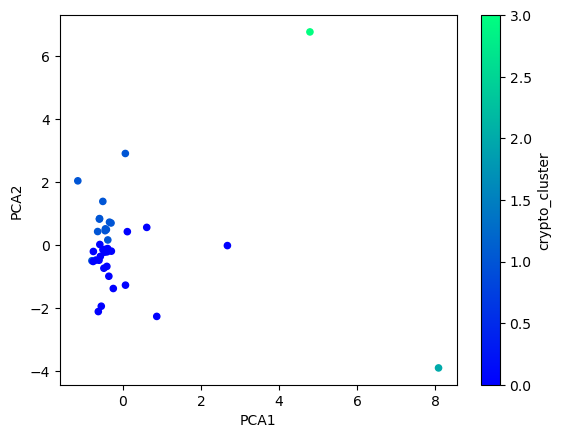

In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
df_stock_data_scaled_pca.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_market_data_3",
    colormap="rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [29]:
# Use the columns from the original scaled DataFrame as the index.
dpca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=cc_df_clean.columns)
pca_component_weights.columns)
pca_component_weights

SyntaxError: invalid syntax (3389479298.py, line 2)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    